<h1 style="font-size:3rem;color:rgb(0, 91, 94);text-align:center;">Topic 2 - Models</h1>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

### Overview
Below is a general overview of this topic: 

The initial focus of this topic is to investigate the mathematical models for applying straight lines to scatterplot data. 

(*Please see plots further down in this notebook for reference.*)

The 'Best Fit Line' model refers to a line through a scatter plot of data points that best expresses the relationship between those points (Line of Best Fit, 2023).

An optimized fit version of this line is created and applied using scipy.optimize.minimize (scipy.optimize.minimize, 2023).

A curved fit version of this is also created and applied using scipy.optimize.curve_fit  (scipy.optimize.curve_fit, 2023).

Later in the topic notebook more advanced information related to fitting a line is shared, including information relating to the Coefficient of determination, which is a number between 0 and 1 which measures how well an outcome is predicted by a statistical model (Turney, 2022).



### References:

Line of Best Fit: Definition, How It Works, and Calculation. (2023). Investopedia website: https://www.investopedia.com/terms/l/line-of-best-fit.asp#:~:text=Key%20Takeaways,for%20indicators%20and%20price%20movements.

scipy.optimize.minimize — SciPy v1.10.0 Manual. (2023). Scipy.org website: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

scipy.optimize.curve_fit — SciPy v1.10.0 Manual. (2023). Scipy.org website: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Turney, S. (2022, April 22). Coefficient of Determination (R2) | Calculation & Interpretation. Scribbr website: https://www.scribbr.com/statistics/coefficient-of-determination/#:~:text=What%20is%20the%20definition%20of,predicted%20by%20the%20statistical%20model.

<h2 style="color:rgb(0, 91, 94)">Exercise 1</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

Use numpy and matplotlib to plot the absolute value function.

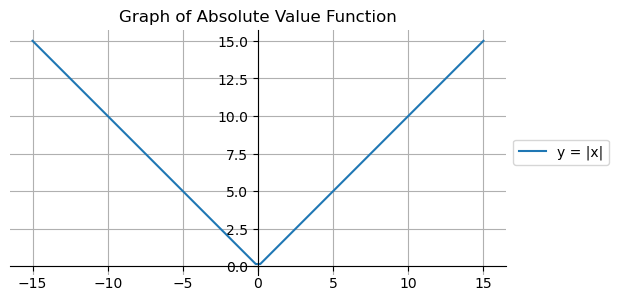

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# assign coordinates
x = np.linspace(start=-15, stop=15, num=100)
y = np.absolute(x)
 
# use set_position
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.set_aspect('equal', adjustable='box')
 
# depict illustration
plt.title("Graph of Absolute Value Function")
plt.plot(x, y, label='y = |x|')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://www.varsitytutors.com/hotmath/hotmath_help/topics/absolute-value-functions
# tps://www.geeksforgeeks.org/how-to-put-the-origin-in-the-center-of-the-figure-with-matplotlib/
# https://www.geeksforgeeks.org/how-to-make-a-square-plot-with-equal-axes-in-matplotlib/
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

The absolute Value Function is not typically used in fitting straight lines to data as, generally, absolute values are difficult to work with in mathematics.

"This is because the use of absolute values results in discontinuous derivatives that cannot be treated analytically; using absolute values requires us to basically go through the entire process of drawing regression lines, measuring the error distances, and summing those errors. We could use a computer to do this, but we still wouldn’t understand what’s going on"
(https://www.bradthiessen.com/html5/docs/ols.pdf)

<h2 style="color:rgb(0, 91, 94)">Exercise 2</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

Fit a straight line to the following data points, using all three methods used above.

In [61]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

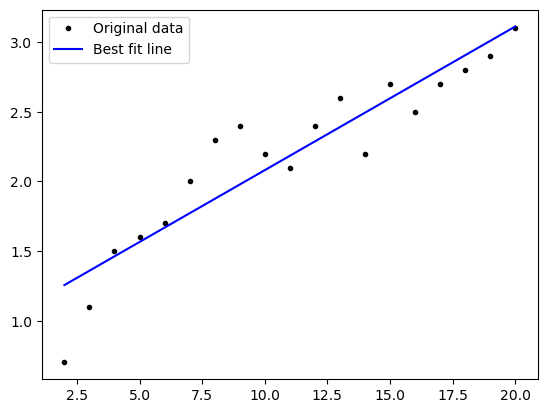

In [62]:
import matplotlib.pyplot as plt
import numpy as np
# Best Fit Line
# Calculate the best values for m and c.

x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

# First calculate the means (a.k.a. averages) of x and y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

np.polyfit(x, y, 1)

# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.legend()

# Show the plot.
plt.show()

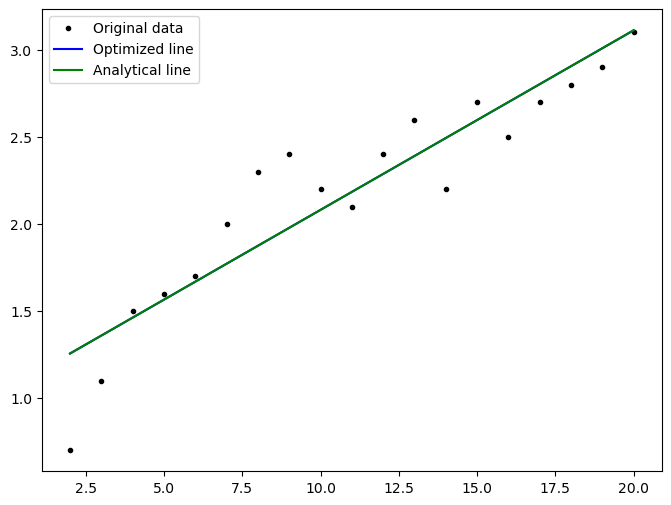

In [63]:
# Optimization.
import scipy.optimize as so

# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y are have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

# Run a quick test.
cost((5.0, 10.0))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))

# Extract the optimized m and c.
m_o, c_o = result.x

# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)

# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

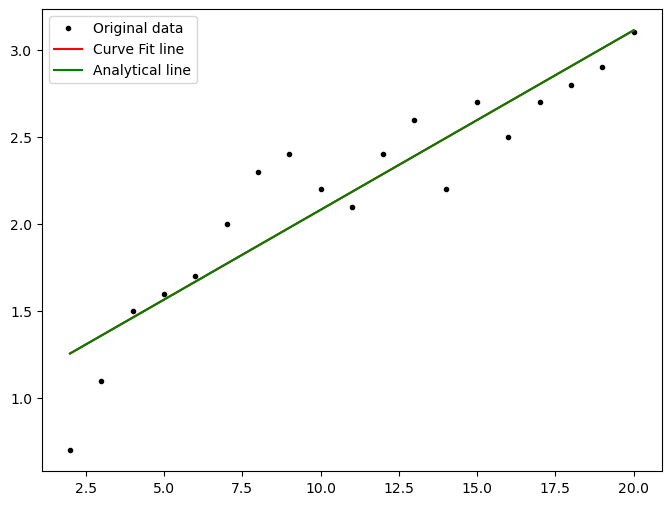

In [64]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c

# Run curve_fit.
result = so.curve_fit(f, x, y)

# Pull out the parameters.
m_f, c_f = result[0]

# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

Do you think a straight line is a good model for these points?

Some of the data points in this selection could be considered outliers, therefore, a straight line may not be the best model for assessing this data. Perhaps a box plot would be a better approach to graphing this selection of data.

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8#:~:text=IQR%20method,upper%20bound%20to%20identify%20outliers.